In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


**Clone and Install**

In [2]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 325 (delta 159), reused 156 (delta 156), pack-reused 107
Receiving objects: 100% (325/325), 2.23 MiB | 20.43 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 67.6 MB/s eta 0:00:00


Let's install the roboflow package, which we will use to download our dataset.

In [3]:
!pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.0 MB/s eta 0:00:00


**Download model weights**

In [4]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [5]:
!ls -la {HOME}/weights

total 402444
drwxr-xr-x 2 root root      4096 Jul  7 16:45 .
drwxr-xr-x 1 root root      4096 Jul  7 16:44 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


**Download the Dataset**

In [6]:
%cd {HOME}/yolov9

/content/yolov9


In [7]:
from roboflow import Roboflow
rf = Roboflow(api_key="lWjBywj3M1I4YI09jTmu")
project = rf.workspace("road-crack-project").project("road-crack-detection-combined-dataset")
version = project.version(2)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Road-Crack-Detection-Combined-Dataset-2 in yolov9:: 100%|██████████| 3510/3510 [00:01<00:00, 3276.34it/s]


## Train Custom Model

In [8]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 100 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-07-07 16:45:41.131353: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-07 16:45:41.131403: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-07 16:45:41.259116: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-07 16:45:41.316069: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-07 16:45:42.544084: W

**Examine Training Results**

In [9]:
!ls {HOME}/yolov9/runs/train/exp/

confusion_matrix.png				    PR_curve.png	   val_batch0_pred.jpg
events.out.tfevents.1720370743.32f005beb9c7.1698.0  R_curve.png		   val_batch1_labels.jpg
F1_curve.png					    results.csv		   val_batch1_pred.jpg
hyp.yaml					    results.png		   val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	   val_batch2_pred.jpg
labels.jpg					    train_batch1.jpg	   weights
opt.yaml					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


In [12]:
import pandas as pd

train_results = pd.read_csv("/content/yolov9/runs/train/exp/results.csv")
train_results.tail()

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/cls_loss,val/dfl_loss,x/lr0,x/lr1,x/lr2
95,95,0.84272,0.55358,1.01250,0.68253,0.59862,0.57927,0.32587,1.6926,1.1383,1.6190,0.000694,0.000694,0.000694
96,96,0.81514,0.53216,0.99763,0.68537,0.59302,0.58978,0.32852,1.7083,1.1777,1.6319,0.000595,0.000595,0.000595
97,97,0.80508,0.53212,0.99116,0.58415,0.62483,0.58427,0.31767,1.7327,1.1445,1.6465,0.000496,0.000496,0.000496
98,98,0.80559,0.53132,0.99165,0.69561,0.56665,0.59521,0.33624,1.7165,1.1661,1.6343,0.000397,0.000397,0.000397
99,99,0.79615,0.51555,0.98830,0.70517,0.56939,0.58669,0.33561,1.7187,1.1658,1.6346,0.000298,0.000298,0.000298


(-0.5, 2399.5, 1199.5, -0.5)

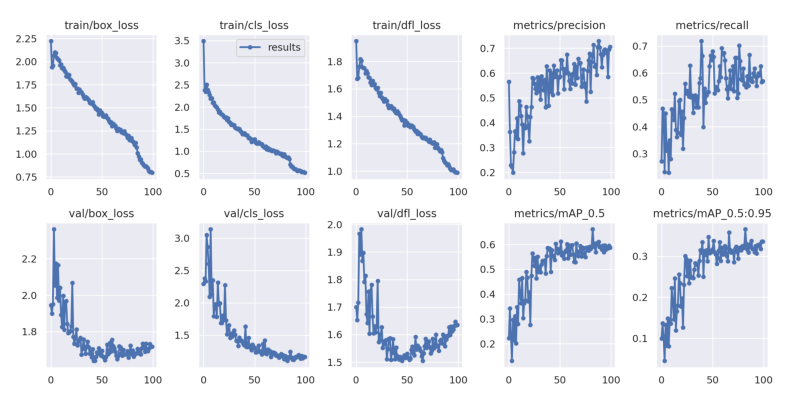

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
train_res = plt.imread("/content/yolov9/runs/train/exp/results.png")
plt.imshow(train_res)
plt.axis("off")

**R_curve**

(-0.5, 2249.5, 1499.5, -0.5)

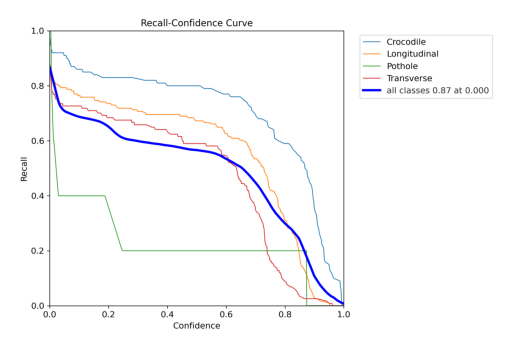

In [14]:
import matplotlib.pyplot as plt

r_curve = plt.imread("/content/yolov9/runs/train/exp/R_curve.png")
plt.imshow(r_curve)
plt.axis("off")

**P-Curve**

(-0.5, 2249.5, 1499.5, -0.5)

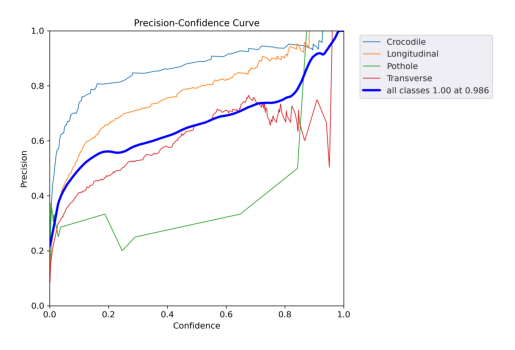

In [15]:
import matplotlib.pyplot as plt

p_curve = plt.imread("/content/yolov9/runs/train/exp/P_curve.png")
plt.imshow(p_curve)
plt.axis("off")

**PR_curve**

(-0.5, 2249.5, 1499.5, -0.5)

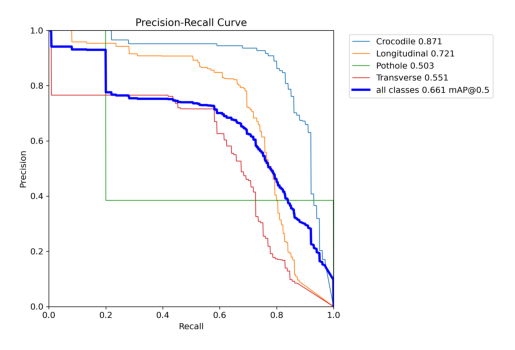

In [16]:
import matplotlib.pyplot as plt

pr_curve = plt.imread("/content/yolov9/runs/train/exp/PR_curve.png")
plt.imshow(pr_curve)
plt.axis("off")

**F1_curve**

(-0.5, 2249.5, 1499.5, -0.5)

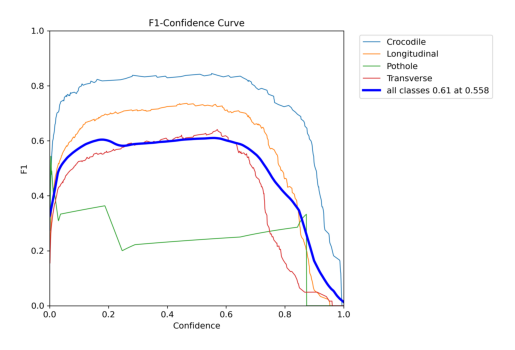

In [17]:
import matplotlib.pyplot as plt

f1_curve = plt.imread("/content/yolov9/runs/train/exp/F1_curve.png")
plt.imshow(f1_curve)
plt.axis("off")

**Confusion Matrix**

(-0.5, 2999.5, 2249.5, -0.5)

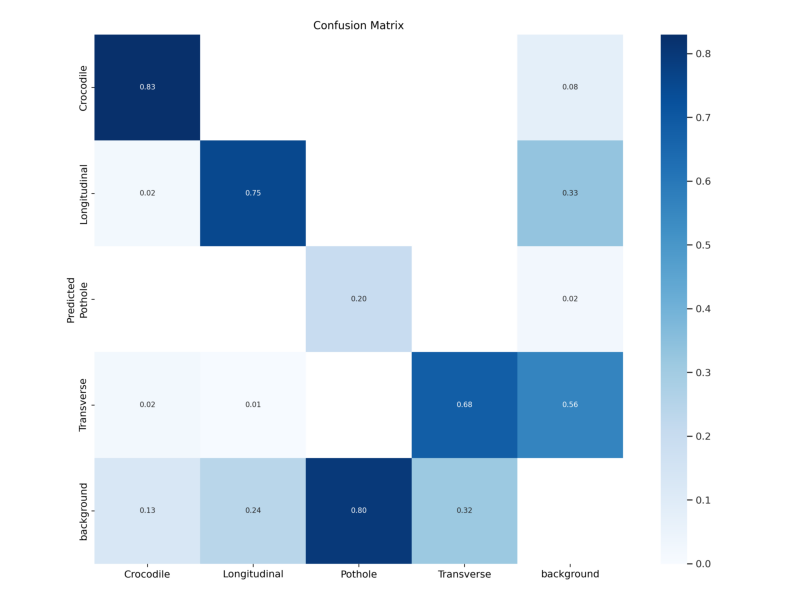

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
cm = plt.imread("/content/yolov9/runs/train/exp/confusion_matrix.png")
plt.imshow(cm)
plt.axis("off")

**Validate results the Yolo V9 on Validation Dataset**

In [20]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 16 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights /content/yolov9/runs/train/exp/weights/best.pt

/content/yolov9
val: data=/content/yolov9/Road-Crack-Detection-Combined-Dataset-2/data.yaml, weights=['/content/yolov9/runs/train/exp/weights/best.pt'], batch_size=16, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414044 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /content/yolov9/Road-Crack-Detection-Combined-Dataset-2/valid/labels.cache... 190 images, 0 backgrounds, 0 corrupt: 100% 190/190 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 12/12 [00:08<00:00,  1.44it/s]
                   all        190        396       0.67      0.561      0.662      0.365


**R_curve**

(-0.5, 2249.5, 1499.5, -0.5)

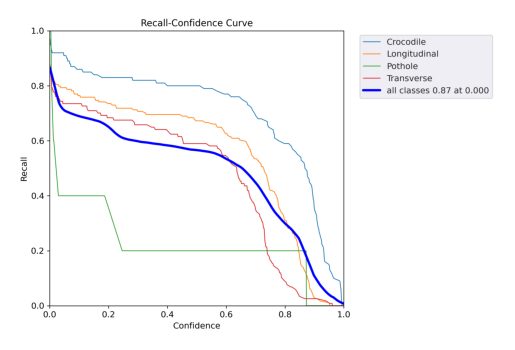

In [21]:
import matplotlib.pyplot as plt

r_curve = plt.imread("/content/yolov9/runs/val/exp2/R_curve.png")
plt.imshow(r_curve)
plt.axis("off")

**P-Curve**

(-0.5, 2249.5, 1499.5, -0.5)

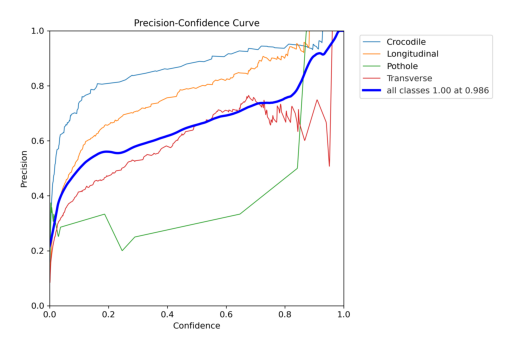

In [22]:
import matplotlib.pyplot as plt

p_curve = plt.imread("/content/yolov9/runs/val/exp2/P_curve.png")
plt.imshow(p_curve)
plt.axis("off")

**PR_curve**

(-0.5, 2249.5, 1499.5, -0.5)

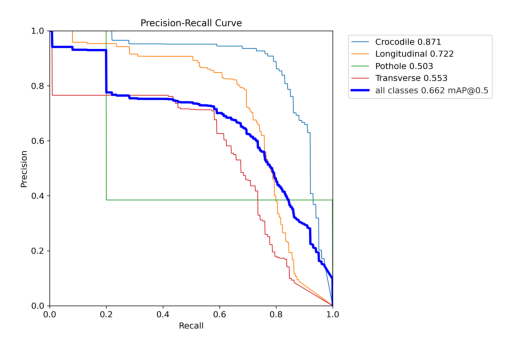

In [23]:
import matplotlib.pyplot as plt

pr_curve = plt.imread("/content/yolov9/runs/val/exp2/PR_curve.png")
plt.imshow(pr_curve)
plt.axis("off")

**F1_curve**

(-0.5, 2249.5, 1499.5, -0.5)

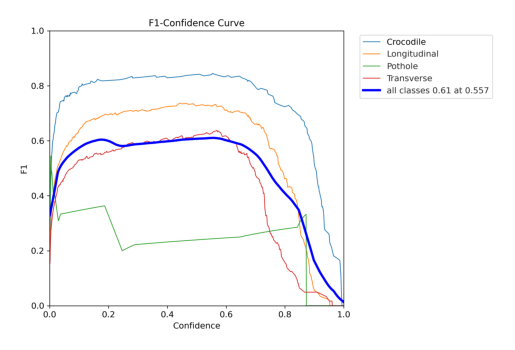

In [24]:
import matplotlib.pyplot as plt

f1_curve = plt.imread("/content/yolov9/runs/val/exp2/F1_curve.png")
plt.imshow(f1_curve)
plt.axis("off")

**Confusion Matrix**

(-0.5, 2999.5, 2249.5, -0.5)

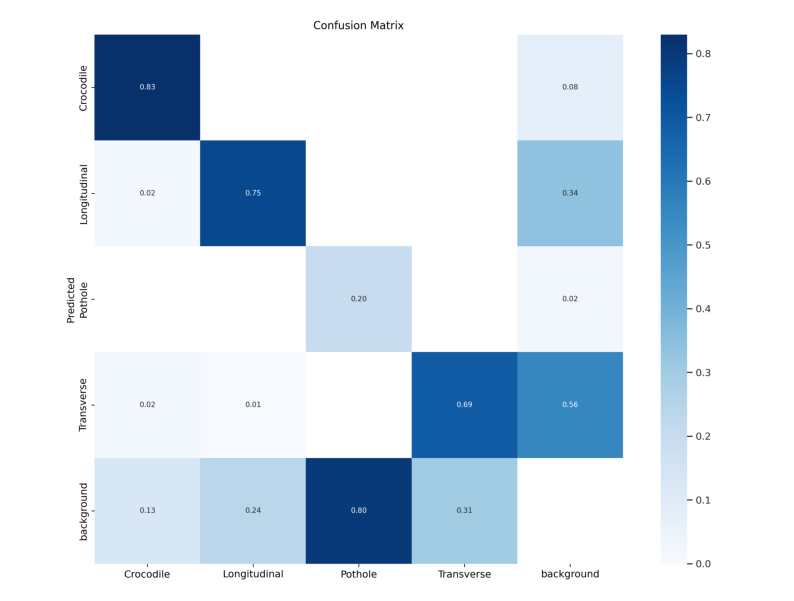

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
cm = plt.imread("/content/yolov9/runs/val/exp2/confusion_matrix.png")
plt.imshow(cm)
plt.axis("off")

In [30]:
%cd /content/yolov9

!python detect.py \
--img 640 --conf 0.1 --iou 0.3 --device 0 \
--data /content/yolov9/Road-Crack-Detection-Combined-Dataset-2/data.yaml \
--weights /content/yolov9/runs/train/exp/weights/best.pt \
--source /content/yolov9/Road-Crack-Detection-Combined-Dataset-2/test/images

/content/yolov9
detect: weights=['/content/yolov9/runs/train/exp/weights/best.pt'], source=/content/yolov9/Road-Crack-Detection-Combined-Dataset-2/test/images, data=/content/yolov9/Road-Crack-Detection-Combined-Dataset-2/data.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.3, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414044 parameters, 0 gradients, 102.5 GFLOPs
image 1/167 /content/yolov9/Road-Crack-Detection-Combined-Dataset-2/test/images/frame1019---Copy_jpg.rf.97797afc733e95ac2025d1d368f58068.jpg: 384x640 1 Crocodile, 1 Longitudinal, 1 Transverse, 190.9ms
image 2/167 /content/yol

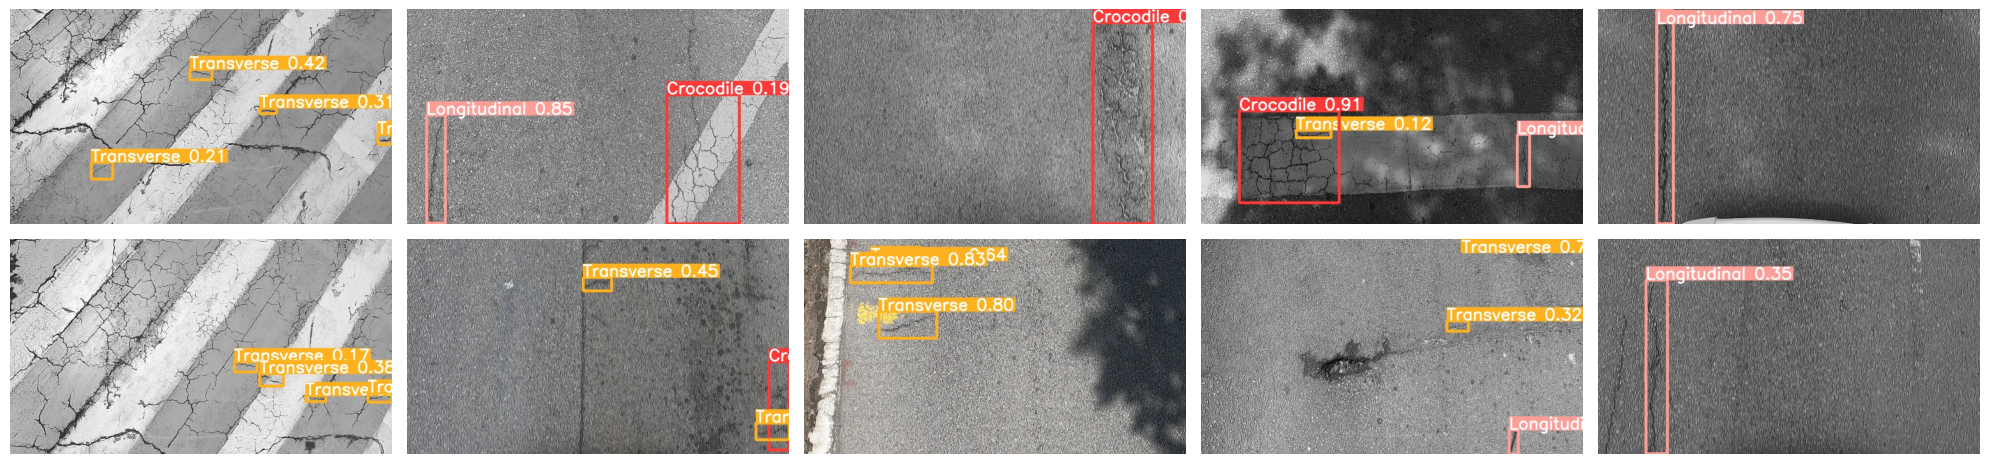

In [31]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to the folder containing images
image_folder = '/content/yolov9/runs/detect/exp3'

# Get a list of image file names in the folder
image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

# Display the first ten images
num_images_to_display = 10
fig, axs = plt.subplots(2, 5, figsize=(20, 5))  # Create a 2x5 grid for displaying images

for i, ax in enumerate(axs.flat):
    if i < len(image_files):
        img_path = os.path.join(image_folder, image_files[i])
        img = mpimg.imread(img_path)
        ax.imshow(img)
        ax.axis('off')  # Hide axes

    else:
        ax.axis('off')  # Hide any unused subplots

plt.tight_layout()
plt.show()
